# Lab 2
## Introduction
This lab introduces slope fields and a numerical DE solver, an improved version of
Euler’s Method. Using these techniques involves a number of commands.

### Slope fields
Plot the slope field for the differential equation
\begin{align*}
\frac{\mathrm{d}y}{\mathrm{d}x} = x - y
\end{align*}
for $-1<x<5$ and $-2<y<4$.

Start by importing the NumPy and Plotly methods we will need. This week, we will start to make more sophisticated plots using Plotly graph objects. We will also need a SciPy method. SciPy extends the capabilities of NumPy.

In [2]:
from plotly.figure_factory import create_quiver
from plotly import graph_objs as go
from numpy import meshgrid, linspace, sqrt
from numpy.testing import assert_almost_equal

from scipy.integrate import odeint

In [15]:
x, y = meshgrid(linspace(-1, 5, 5), linspace(-2, 4, 5))

In [8]:
print(x)
print(y)

[[-1.   0.5  2.   3.5  5. ]
 [-1.   0.5  2.   3.5  5. ]
 [-1.   0.5  2.   3.5  5. ]
 [-1.   0.5  2.   3.5  5. ]
 [-1.   0.5  2.   3.5  5. ]]
[[-2.  -2.  -2.  -2.  -2. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5]
 [ 1.   1.   1.   1.   1. ]
 [ 2.5  2.5  2.5  2.5  2.5]
 [ 4.   4.   4.   4.   4. ]]


In [17]:
S = x - y
print(S)
L = sqrt(1 + S**2)
print(L)

[[ 1.   2.5  4.   5.5  7. ]
 [-0.5  1.   2.5  4.   5.5]
 [-2.  -0.5  1.   2.5  4. ]
 [-3.5 -2.  -0.5  1.   2.5]
 [-5.  -3.5 -2.  -0.5  1. ]]
[[1.41421356 2.6925824  4.12310563 5.59016994 7.07106781]
 [1.11803399 1.41421356 2.6925824  4.12310563 5.59016994]
 [2.23606798 1.11803399 1.41421356 2.6925824  4.12310563]
 [3.64005494 2.23606798 1.11803399 1.41421356 2.6925824 ]
 [5.09901951 3.64005494 2.23606798 1.11803399 1.41421356]]


Now plot the slope field. A slope field is a special type of _quiver_ plot. We create NumPy arrays that say where to plot the line segments (`x` and `y`) and arrays to point them in the right direction (`1/L` and `S/L`). The `layout.update` method is optional, but makes the plot prettier and easier to understand.

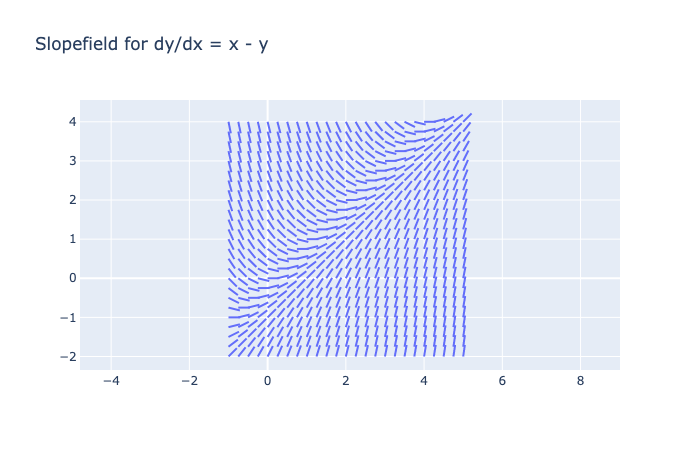

In [31]:
x, y = meshgrid(linspace(-1, 5, 25), linspace(-2, 4, 25))
S = x - y
L = sqrt(1 + S**2)
fig = create_quiver(x, y, 1/L, S/L, scale=0.3, arrow_scale=1e-16)
fig.layout.update(title_text="Slopefield for dy/dx = x - y",
                  yaxis=dict(scaleanchor='x', scaleratio=1))
fig.show('png')

`1/L` and `S/L` in the `create_quiver` command set the $x$ and $y$ lengths (components) of the line segment at each point in the grid.

Note that NumPy operates element-wise by default, so `x - y` creates an array of differences, and `S/L` creates an array of quotients. For `1/L`, NumPy does something special called _broadcasting_. It assumes that you meant "divide an array of ones by the elements of `L`".

The slope of the line segment is then $(S/L)/(1/L) = S$, and the length is
\begin{align*}
\sqrt{\left(\frac{1}{L}\right)^2 + \left(\frac{S}{L}\right)^2} &= \sqrt{\frac{1+S^2}{L^2}}\\
&= 1.
\end{align*}

### Numerical/graphical solution of an initial-value problem
Plot the (approximate) solution to the initial-value problem
\begin{align*}
\frac{\mathrm{d}y}{\mathrm{d}x} = x - y\qquad y(-1)=0
\end{align*}
for $-1 < x <5$. Find $y(5)$.

Here we use a numerical DE solver `scipy.integrate.odeint` (which we imported as `odeint`), an improved version of Euler’s Method. To use `odeint`, we need to define the differential equation in a _function_ and then feed it to `odeint`.

First define the function. Note that in Python, [white space is important](https://xkcd.com/353/). That is, you have to indent the contents of your function or Python will complain. Most of the time Jupyter will figure out your intentions and auto-indent.

In [32]:
def diff_eq(y, x):
    return x - y

- The `def` keyword tells Python you would like to define a function.
- In this case the function is called `diff_eq` and takes arguments `y` and `x`.
- The `return` statement tells Python what you would like to return.
- When you stop indenting, the function is over.

Note that `odeint` expects the function (`diff_eq` here) to take (at least) two arguments, where the first (`y` here) is the dependent variable and the second (`x` here) is the independent variable, even if these variables do not appear in the RHS of the DE.

Now ask `odeint` to generate a solution to our DE.

In [33]:
x = linspace(-1, 5, 61)
y = odeint(diff_eq, 0, x).flatten()

- `linspace` creates an array of (`61`, in this case) equally-spaced elements.
- `odeint` calculates `y` for each value of `x`.
- In Python, functions are objects like any other. In this case we pass `diff_eq` as an argument to `odeint`.
- The second argument to `odeint` (`0` here) is the initial value of $y$. It must correspond to the first value of `x`.
- `odeint` returns a 2D array. We need a 1D array for plotting so we `flatten` it.

The following will plot `x` and `y` in a line diagram. Notice the syntax is more complicated than last week. We create the figure, add the line to it, then show it. The advantage of this syntax is that it can be extended to show more than one line on a graph, as we will see below.

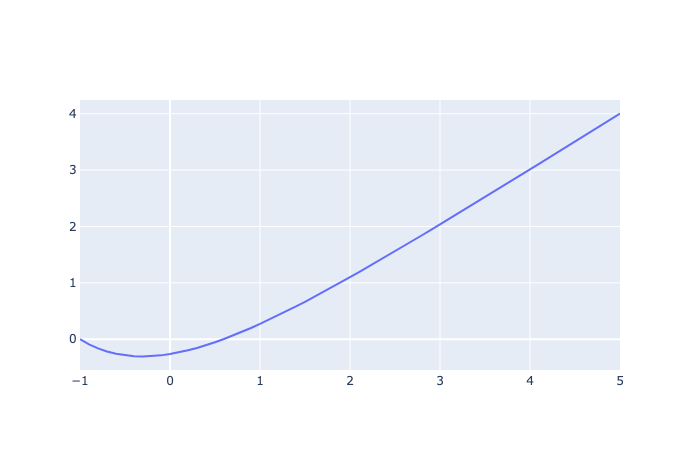

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y))
fig.show('png')

Finally, to calculate $y(5)$, we realise that the values calculated by `odeint` are stored in the array `y`. So display `y`.

In [26]:
y

array([ 0.00000000e+00, -9.03251386e-02, -1.62538482e-01, -2.18363535e-01,
       -2.59359883e-01, -2.86938655e-01, -3.02376692e-01, -3.06829367e-01,
       -3.01342060e-01, -2.86860674e-01, -2.64241113e-01, -2.34257830e-01,
       -1.97611575e-01, -1.54936414e-01, -1.06806078e-01, -5.37396875e-02,
        3.79302683e-03,  6.53670377e-02,  1.30597765e-01,  1.99137226e-01,
        2.70670553e-01,  3.44912843e-01,  4.21606303e-01,  5.00517671e-01,
        5.81435894e-01,  6.64169990e-01,  7.48547154e-01,  8.34411023e-01,
        9.21620124e-01,  1.01004644e+00,  1.09957414e+00,  1.19009840e+00,
        1.28152441e+00,  1.37376633e+00,  1.46674654e+00,  1.56039477e+00,
        1.65464745e+00,  1.74944706e+00,  1.84474155e+00,  1.94048383e+00,
        2.03663128e+00,  2.13314535e+00,  2.22999116e+00,  2.32713712e+00,
        2.42455468e+00,  2.52221800e+00,  2.62010367e+00,  2.71819056e+00,
        2.81645950e+00,  2.91489317e+00,  3.01347590e+00,  3.11219350e+00,
        3.21103313e+00,  

Here we just want the last value. We can grab the last element of the array with `y[-1]`. (`y[-2]` gives the second last element.)

In [27]:
y[-1]

4.004957501717463

In [30]:
y[-2]

3.905478886771023

`x[-1]` is th elast element of `x`. Check it too.

In [28]:
x[-1]

5.0

Now we will plot multiple (approximate) solutions on the same graph. We do that by just adding each line as we go. Does the resulting figure make sense?

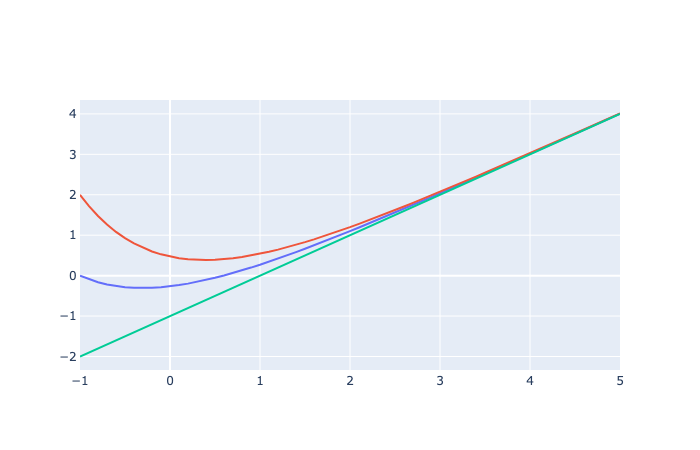

In [35]:
fig = go.Figure()
x = linspace(-1, 5, 61)
y = odeint(diff_eq, 0, x).flatten()
fig.add_trace(go.Scatter(x=x, y=y))
y = odeint(diff_eq, 2, x).flatten()
fig.add_trace(go.Scatter(x=x, y=y))
y = odeint(diff_eq, -2, x).flatten()
fig.add_trace(go.Scatter(x=x, y=y))
fig.layout.update(showlegend=False)
fig.show('png')

Now let’s put the slope field and the numerical solutions together. Copy and paste the code from above where we created the quiver plot into the cell below. Delete the `fig.show()` command and replace it with the code from the above cell. Delete the command where we create an empty figure (`fig = go.Figure()`), because we want to add our line plots to the slope field.

If you have done it properly, the result should look like this:

![](images/week-2.png)

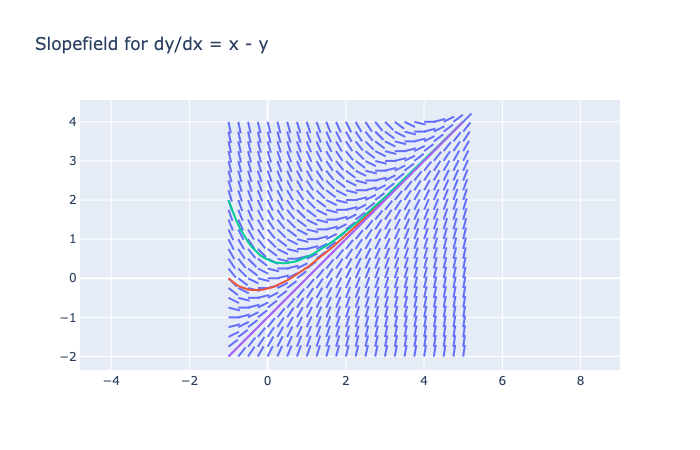

In [38]:
x, y = meshgrid(linspace(-1, 5, 25), linspace(-2, 4, 25))
S = x - y
L = sqrt(1 + S**2)
fig = create_quiver(x, y, 1/L, S/L, scale=0.3, arrow_scale=1e-16)
fig.layout.update(title_text="Slopefield for dy/dx = x - y",
                  yaxis=dict(scaleanchor='x', scaleratio=1))

x = linspace(-1, 5, 61)
y = odeint(diff_eq, 0, x).flatten()
fig.add_trace(go.Scatter(x=x, y=y))
y = odeint(diff_eq, 2, x).flatten()
fig.add_trace(go.Scatter(x=x, y=y))
y = odeint(diff_eq, -2, x).flatten()
fig.add_trace(go.Scatter(x=x, y=y))
fig.layout.update(showlegend=False)

fig.show('png')

## Exercises

Start by importing the tools we will need.

### Slope field and DE solution plot

Plot on the one figure the slopefield for the DE
\begin{align*}
\frac{\mathrm{d} y}{\mathrm{d} x} = 2.5y (1 − y)\qquad y(0) = 0.5,
\end{align*}
and the solutions $y(x)$ with $y(0) = 0.2$, $y(0) = 0.5$ and $y(0) = 0.8$.

Start by writing down a new definition for `diff_eq` below. Do not change the function's name or inputs.

In [41]:
def diff_eq(y, x):
    return 2.5*y*(1-y)

In [42]:
(y, x)

(array([-2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
        -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
        -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
        -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
        -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        -4.59465799e-13,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
         4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
         8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
         1.20000000e+00,  1.30000000e+00,  1.40000000e+00,  1.50000000e+00,
         1.60000000e+00,  1.70000000e+00,  1.80000000e+00,  1.90000000e+00,
         2.00000000e+00,  2.10000000e+00,  2.20000000e+00,  2.30000000e+00,
         2.40000000e+00,  2.50000000e+00,  2.60000000e+00,  2.70000000e+00,
         2.80000000e+00,  2.90000000e+00,  3.00000000e+00,  3.10000000e+00,
         3.2

If you have implemented `diff_eq` correctly, the following should print "nice job".

In [43]:
assert_almost_equal(diff_eq(0.4, 0), 0.6)
assert_almost_equal(diff_eq(0.4, 10), 0.6)
assert_almost_equal(diff_eq(1, 0), 0)
print("nice job")

nice job


Now create your graph. Note that you will have to redefine `S` (from the lab). You can do that using your new definition for `diff_eq` or by writing out the RHS of the equation again.

You will also have to change your definition of the meshgrid for the slopefield and the domain and initial values in the `odeint` commands. You want about 21 steps in the x and y ranges in meshgrid. If you change the scaling factor from 0.3 to 0.04 in `create_quiver`, you will get a better slope field.

Create the plot for the region $0 < x < 1$ and $0 < y < 1$.

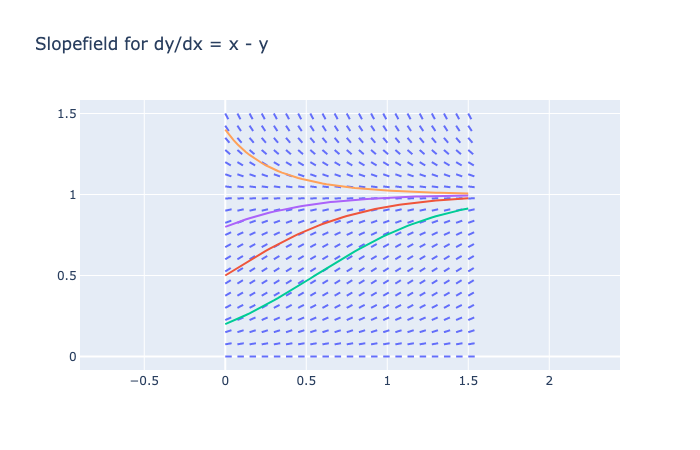

In [52]:
def diff_eq(y, x):
    return 2.5*y*(1-y)
x, y = meshgrid(linspace(0, 1.5, 21), linspace(0, 1.5, 21))
S = 2.5*y*(1-y)
L = sqrt(1 + S**2)
fig = create_quiver(x, y, 1/L, S/L, scale=0.04, arrow_scale=1e-16)
fig.layout.update(title_text="Slopefield for dy/dx = x - y",
                  yaxis=dict(scaleanchor='x', scaleratio=1))
x = linspace(0, 1.5, 61)
y = odeint(diff_eq, 0.5, x).flatten()
fig.add_trace(go.Scatter(x=x, y=y))
y = odeint(diff_eq, 0.2, x).flatten()
fig.add_trace(go.Scatter(x=x, y=y))
y = odeint(diff_eq, 0.8, x).flatten()
fig.add_trace(go.Scatter(x=x, y=y))
y = odeint(diff_eq, 1.4, x).flatten()
fig.add_trace(go.Scatter(x=x, y=y))
fig.layout.update(showlegend=False)
fig.show('png')

### Solution at a point
What is $y(1)$ if $y(0)=0.8$?

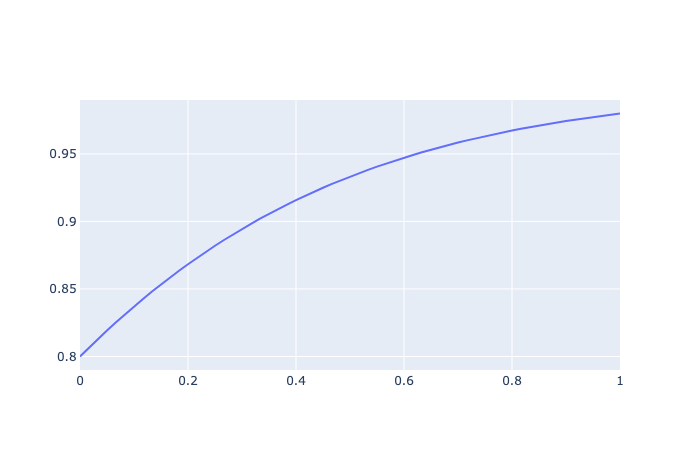

In [57]:
fig = go.Figure()
x = linspace(0, 1, 61)
y = odeint(diff_eq, 0.8, x).flatten()
fig.add_trace(go.Scatter(x=x, y=y))
fig.show('png')

In [54]:
odeint(diff_eq, 0.8, [0, 1])

array([[0.8      ],
       [0.9798914]])